# Linear Regression

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## Calculate RMSE and R^2

In [52]:
def acc(x_act, y_act):
    y_pred = b0 + b1 * x_act 
    n = len(x_act)
    rmse = np.sqrt((np.sum((y_act - y_pred) ** 2) / n)) 
    rss = np.sum((y_act - y_pred) ** 2)
    tss = np.sum((y_act - np.mean(y_act)) ** 2)
    r2 = 1 - (rss / tss)

    return rmse, r2

## Calculate Coefficient

In [53]:
def coefficient(X_train, y_train):
    X_mean = np.mean(X_train)
    y_mean = np.mean(y_train)

    numerator = np.sum((X_train - X_mean) * (y_train - y_mean))
    denominator = np.sum((X_train - X_mean) ** 2)

    b1 = numerator / denominator
    b0 = y_mean - (X_mean * b1)

    return b0, b1

## Load Headbrain Data

In [54]:
dataset = pd.read_csv('headbrain.csv')

X = dataset['Head Size(cm^3)'].values
X = np.apply_along_axis(lambda c: (c - c.min())/(c.max() - c.min()), 0, X)
y = dataset['Brain Weight(grams)'].values
y = np.apply_along_axis(lambda c: (c - c.min())/(c.max() - c.min()), 0, y)

dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

b0, b1 = coefficient(X_train, y_train)
print(f'b0 = {b0}')
print(f'b1 = {b1}')

b0 = 0.12083627804645647
b1 = 0.8053296693175164


## Plot Model and Head Size Vs Brain Weight

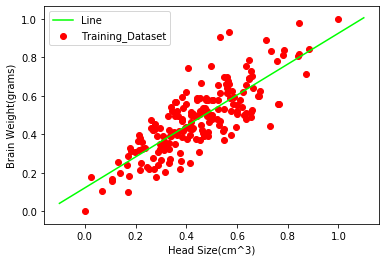

In [56]:
X_max = np.max(X_train) + 0.1
X_min = np.min(X_train) - 0.1

x_tr = np.linspace(X_min, X_max, 1000)
y_tr = b0 + b1 * x_tr 

plt.plot(x_tr, y_tr, c='#00ff00', label='Line')
plt.scatter(X_train, y_train, c='#ff0000' ,label='Training_Dataset')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [57]:
train_rmse, train_r2 = acc(X_train, y_train)
test_rmse, test_r2 = acc(X_test, y_test)

print(f'Training Set\nRMSE = {train_rmse}\nR2 = {train_r2}')
print(f'Testing Set\nRMSE = {test_rmse}\nR2 = {test_r2}')

Training Set
RMSE = 0.102852793518817
R2 = 0.65944320736707
Testing Set
RMSE = 0.11818216561992519
R2 = 0.5571552826824453
